# DATA 102 Final Project
## Prepared by: Hannah Altea Jumilla, Bridget Parro, Romm Samson


---
## Table of Contents
### Chapter 1: Problem Statement
### Chapter 2: Exploratory Data Analysis
### Chapter 3: Data Cleaning
### Chapter 4: Recommender Systems
### Chapter 5: Clustering
### Chapter 6: Conclusion
### References
---

## Chapter 1: Problem Statement

### About the Data:
The dataset contains 7,000 online reviews of electronic products from Amazon and Best Buy, sourced from Kaggle, and is part of a larger dataset provided by Datafiniti. The dataset includes the product name, brand, categories, color, Amazon Standard Identification Number, among other attributes.


### Problem Statement

With the explosion of e-commerce platforms like Amazon and Best Buy, consumers are overwhelmed with the number of product reviews. While these reviews contain valuable insights into what people like and dislike about products, the sheer volume can make it difficult to sift through and make informed decisions. For companies, understanding these vast amounts of feedback is crucial for staying competitive and meeting customer needs.

This project aims to tackle these challenges using a dataset of online reviews of electronic products from Amazon and Best Buy. We will focus on three key areas: exploratory data analysis (EDA), a recommender system, and clustering.

First, through EDA, we'll dive into the data to uncover trends and patterns. We'll identify the most reviewed brands and products, helping us understand which items are popular and why. This analysis will also give us insights into customer satisfaction and common issues.

Next, we'll develop a recommender system to provide personalized product recommendations. By analyzing user preferences and past behaviors, we can suggest products that match individual tastes and needs, making the shopping experience more tailored and enjoyable.

Finally, we'll use clustering techniques to group similar products and reviews. This will help us identify distinct market segments, allowing businesses to tailor their marketing strategies and improve their product offerings based on specific customer groups.

By combining these approaches, the project aims to enhance the shopping experience for consumers and provide businesses with actionable insights to optimize their product strategies and boost customer satisfaction.

### Data Collection

The data collection for this project is grounded in a dataset sourced from Kaggle, which compiles over 7,000 online reviews of electronic  The richness of this data allows for a comprehensive analysis of consumer feedback, helping us to build a good understanding of consumer preferences.

---
## Chapter 2: Exploratory Data Analysis

###  Import Libraries & Check Basic Structure

In [ ]:
from google.colab import drive
drive.mount('/content/drive')



Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data from Google Drive
file_path = '/content/drive/MyDrive/[DATA102] Final Project/DatafinitiElectronicsProductData.csv'
df_electronics = pd.read_csv(file_path)

# Rename columns to remove 'reviews.' prefix
df_electronics.columns = df_electronics.columns.str.replace('reviews.', '', regex=False)

# Display basic information about the dataframe
print(df_electronics.info())

# Display the first few rows of the dataframe
df_electronics.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7299 entries, 0 to 7298
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  7299 non-null   object 
 1   asins               7299 non-null   object 
 2   brand               7299 non-null   object 
 3   categories          7299 non-null   object 
 4   colors              5280 non-null   object 
 5   dateAdded           7299 non-null   object 
 6   dateUpdated         7299 non-null   object 
 7   dimension           6090 non-null   object 
 8   ean                 2951 non-null   float64
 9   imageURLs           7299 non-null   object 
 10  keys                7299 non-null   object 
 11  manufacturer        4632 non-null   object 
 12  manufacturerNumber  7299 non-null   object 
 13  name                7299 non-null   object 
 14  primaryCategories   7299 non-null   object 
 15  date                7238 non-null   object 
 16  dateSe

,id,asins,brand,categories,colors,dateAdded,dateUpdated,dimension,ean,imageURLs,...,doRecommend,numHelpful,rating,sourceURLs,text,title,username,sourceURLs,upc,weight
0,AVpf3txeLJeJML43FN82,B0168YIWSI,Microsoft,"Electronics,Computers,Computer Accessories,Key...",Black,2015-11-13T12:28:09Z,2018-01-29T02:15:13Z,11.6 in x 8.5 in x 0.19 in,8.900000e+11,https://i5.walmartimages.com/asr/2a41f6f0-844e...,...,True,0.0,5.0,http://reviews.bestbuy.com/3545/4562009/review...,"This keyboard is very easy to type on, but the...",Love the fingerprint reader,JNH1,https://www.walmart.com/ip/Microsoft-Surface-P...,8.900000e+11,1.1 pounds
1,AVpf3txeLJeJML43FN82,B0168YIWSI,Microsoft,"Electronics,Computers,Computer Accessories,Key...",Black,2015-11-13T12:28:09Z,2018-01-29T02:15:13Z,11.6 in x 8.5 in x 0.19 in,8.900000e+11,https://i5.walmartimages.com/asr/2a41f6f0-844e...,...,True,0.0,4.0,http://reviews.bestbuy.com/3545/4562009/review...,It's thin and light. I can type pretty easily ...,Nice,Appa,https://www.walmart.com/ip/Microsoft-Surface-P...,8.900000e+11,1.1 pounds
2,AVpf3txeLJeJML43FN82,B0168YIWSI,Microsoft,"Electronics,Computers,Computer Accessories,Key...",Black,2015-11-13T12:28:09Z,2018-01-29T02:15:13Z,11.6 in x 8.5 in x 0.19 in,8.900000e+11,https://i5.walmartimages.com/asr/2a41f6f0-844e...,...,True,0.0,4.0,http://reviews.bestbuy.com/3545/4562009/review...,I love the new design the keys are spaced well...,New,Kman,https://www.walmart.com/ip/Microsoft-Surface-P...,8.900000e+11,1.1 pounds
3,AVpf3txeLJeJML43FN82,B0168YIWSI,Microsoft,"Electronics,Computers,Computer Accessories,Key...",Black,2015-11-13T12:28:09Z,2018-01-29T02:15:13Z,11.6 in x 8.5 in x 0.19 in,8.900000e+11,https://i5.walmartimages.com/asr/2a41f6f0-844e...,...,True,0.0,5.0,http://reviews.bestbuy.com/3545/4562009/review...,Attached easily and firmly. Has a nice feel. A...,Nice keyboard,UpstateNY,https://www.walmart.com/ip/Microsoft-Surface-P...,8.900000e+11,1.1 pounds
4,AVpf3txeLJeJML43FN82,B0168YIWSI,Microsoft,"Electronics,Computers,Computer Accessories,Key...",Black,2015-11-13T12:28:09Z,2018-01-29T02:15:13Z,11.6 in x 8.5 in x 0.19 in,8.900000e+11,https://i5.walmartimages.com/asr/2a41f6f0-844e...,...,True,0.0,5.0,http://reviews.bestbuy.com/3545/4562009/review...,"Our original keyboard was okay, but did not ha...",Nice improvement,Glickster,https://www.walmart.com/ip/Microsoft-Surface-P...,8.900000e+11,1.1 pounds


### What's the data?

In [ ]:
# Display basic statistics for numeric columns
df_electronics.describe()

# Display basic statistics for non-numeric columns
df_electronics.describe(include=[object])

,id,asins,brand,categories,colors,dateAdded,dateUpdated,dimension,imageURLs,keys,...,primaryCategories,date,dateSeen,doRecommend,sourceURLs,text,title,username,sourceURLs,weight
count,7299,7299,7299,7299,5280,7299,7299,6090,7299,7299,...,7299,7238,7299,5908,7299,7294,7295,7297,7299,7299
unique,50,50,38,49,17,50,47,34,50,50,...,1,1740,911,2,2302,7205,5535,6492,50,49
top,AVpgfP3DilAPnD_xtG3M,B00IAKLM54,Logitech,"Electronics,Accessories & Supplies,Audio & Vid...",Black,2015-05-18T12:55:52Z,2018-03-23T17:22:18Z,2.2 x 1.2 x 7.3 inches,https://images-na.ssl-images-amazon.com/images...,"logitech/915000224,logitech915000224harmonyult...",...,Electronics,2017-07-19T00:00:00.000Z,"2017-09-08T00:00:00Z,2017-08-31T00:00:00Z,2017...",True,https://www.amazon.com/product-reviews/B00IAKL...,Using this with a Sony BD player and Onkyo 5.1...,Five Stars,ByAmazon Customer,https://www.amazon.com/Logitech-Ultimate-15-De...,1.7 pounds
freq,1604,1604,1692,1604,2920,1604,1604,1604,1604,1604,...,7299,55,800,5401,585,7,135,63,1604,1604


### Data Cleaning

In [ ]:
# Extract necessary columns
df_ratings = df_electronics[['username', 'asins', 'name', 'rating']]
df_categories = df_electronics[['asins', 'name', 'categories']]

# Clean the categories column
df_categories['categories'] = df_categories['categories'].str.replace('and', '&', regex=False)
df_categories['categories'] = df_categories['categories'].str.split(',')

# Create a copy for further processing
df_categories_final = df_categories.copy(deep=True)

# One-hot encode the categories
x = []
for index, row in df_categories.iterrows():
    x.append(index)
    for category in row['categories']:
        df_categories_final.at[index, category.strip()] = 1

# Display the transformed dataframe
df_categories_final.head()


<ipython-input-5-fb22b4dc68cc>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_categories['categories'] = df_categories['categories'].str.replace('and', '&', regex=False)
<ipython-input-5-fb22b4dc68cc>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_categories['categories'] = df_categories['categories'].str.split(',')
<ipython-input-5-fb22b4dc68cc>:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Co

,asins,name,categories,Electronics,Computers,Computer Accessories,Keyboards,Mice & Joysticks,All Keyboards,Computers & Accessories,...,Projectors & Presentation Equipment,Audio Visual Presentation,TV St&s,Mounts & Furniture,Projector Mounts Accessories,Projector Mounts & Screens,Projector Mounts,Mounts Carts,Mounting Plates,Powerline Network Adapters
0,B0168YIWSI,Microsoft Surface Pro 4 Type Cover with Finger...,"[Electronics, Computers, Computer Accessories,...",1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,B0168YIWSI,Microsoft Surface Pro 4 Type Cover with Finger...,"[Electronics, Computers, Computer Accessories,...",1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,B0168YIWSI,Microsoft Surface Pro 4 Type Cover with Finger...,"[Electronics, Computers, Computer Accessories,...",1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,B0168YIWSI,Microsoft Surface Pro 4 Type Cover with Finger...,"[Electronics, Computers, Computer Accessories,...",1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,B0168YIWSI,Microsoft Surface Pro 4 Type Cover with Finger...,"[Electronics, Computers, Computer Accessories,...",1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### What's the data distribution? Is it balanced/imbalanced?

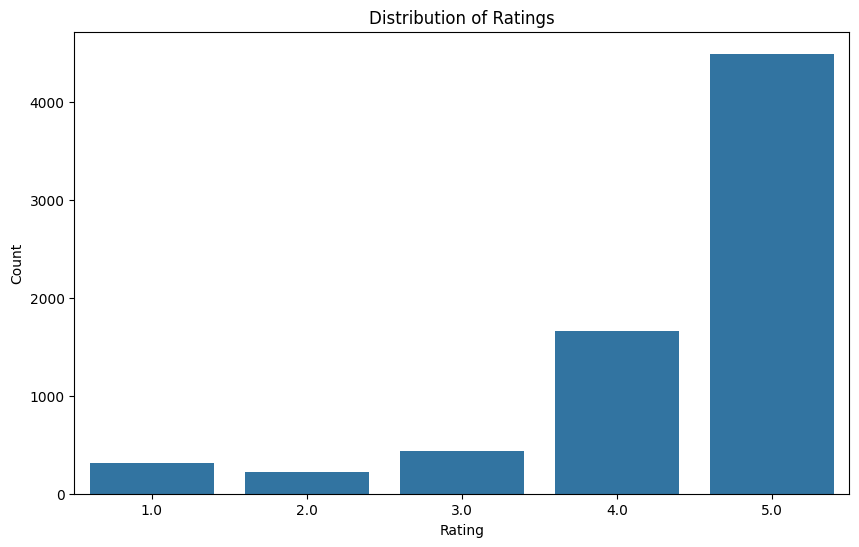

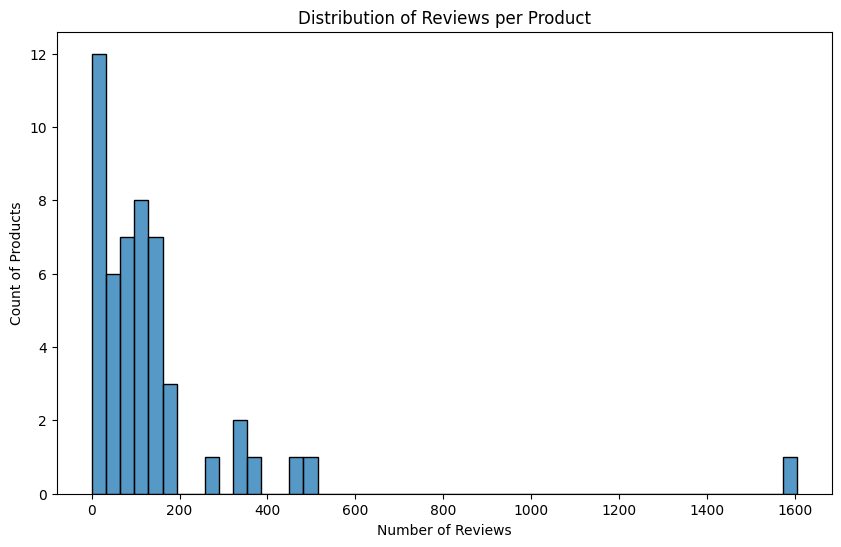

In [ ]:
# Distribution of ratings
plt.figure(figsize=(10, 6))
sns.countplot(x='rating', data=df_ratings)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

# Distribution of reviews per product
reviews_per_product = df_ratings['name'].value_counts()
plt.figure(figsize=(10, 6))
sns.histplot(reviews_per_product, bins=50, kde=False)
plt.title('Distribution of Reviews per Product')
plt.xlabel('Number of Reviews')
plt.ylabel('Count of Products')
plt.show()


### Patterns in the data

In [ ]:
# Most reviewed products
most_reviewed_products = df_ratings['name'].value_counts().head(10)
print("Most Reviewed Products:\n", most_reviewed_products)

# Most active reviewers
most_active_reviewers = df_ratings['username'].value_counts().head(10)
print("Most Active Reviewers:\n", most_active_reviewers)

# Convert necessary columns to numeric, if they aren't already
for col in df_categories_final.columns[2:]:
    df_categories_final[col] = pd.to_numeric(df_categories_final[col], errors='coerce')

# Most common categories
most_common_categories = df_categories_final.iloc[:, 2:].sum().sort_values(ascending=False).head(10)
print("Most Common Categories:\n", most_common_categories)



Most Reviewed Products:
 name
Logitech 915-000224  Harmony Ultimate One 15-Device Universal Infrared Remote with Customizable Touch Screen Control - Black    1604
Microsoft Surface Pro 4 Type Cover with Fingerprint ID                                                                           507
Sony SRSXB30/BLK XB30 Portable Wireless Speaker with Bluetooth                                                                   477
Everest Elite 700 Around-Ear Wireless Headphones (White)                                                                         357
Slingbox M2                                                                                                                      342
SAMSUNG 40'' Class FHD (1080P) Smart LED TV (UN40M5300)                                                                          340
Alpine - 6-1/2" 2-Way Coaxial Car Speakers with Polypropylene Cones (Pair) - Black                                               270
PNY Anarchy 16GB Kit (2x8GB) DDR4 2400M

### Visualizations for insights

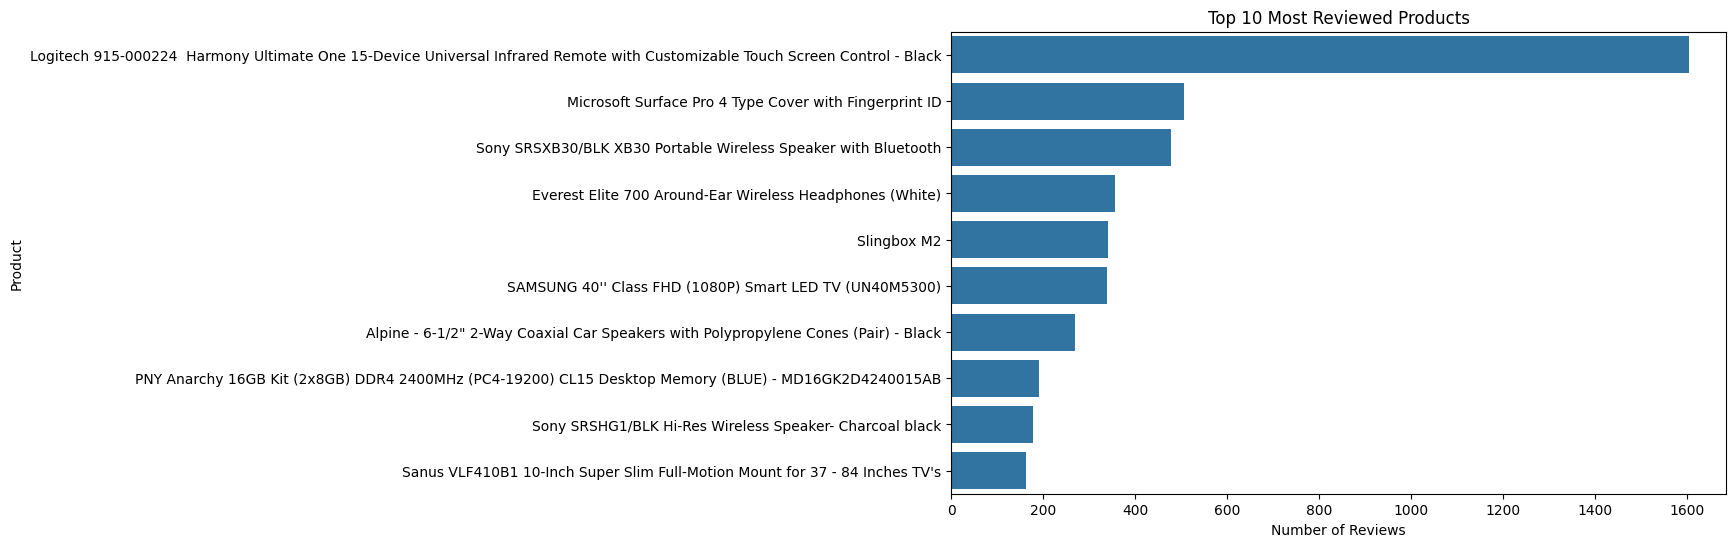

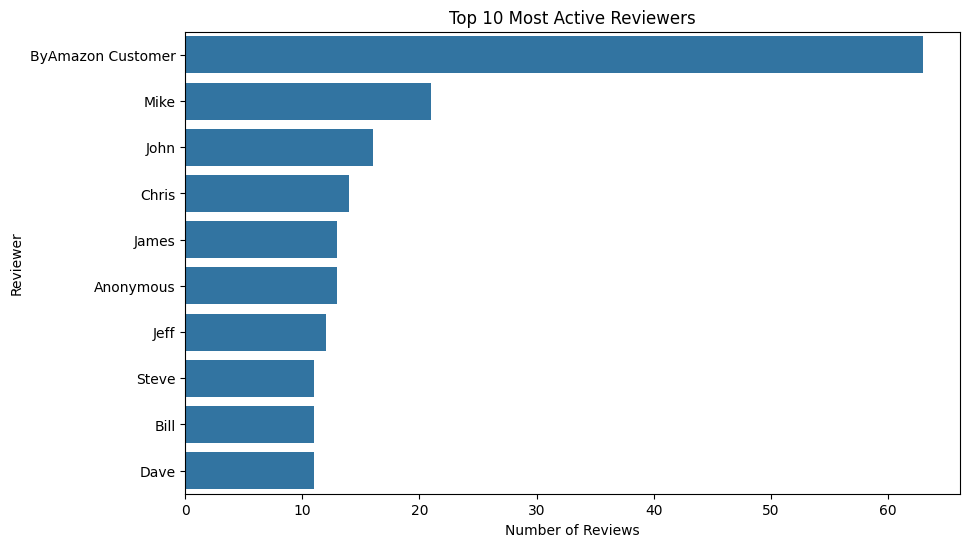

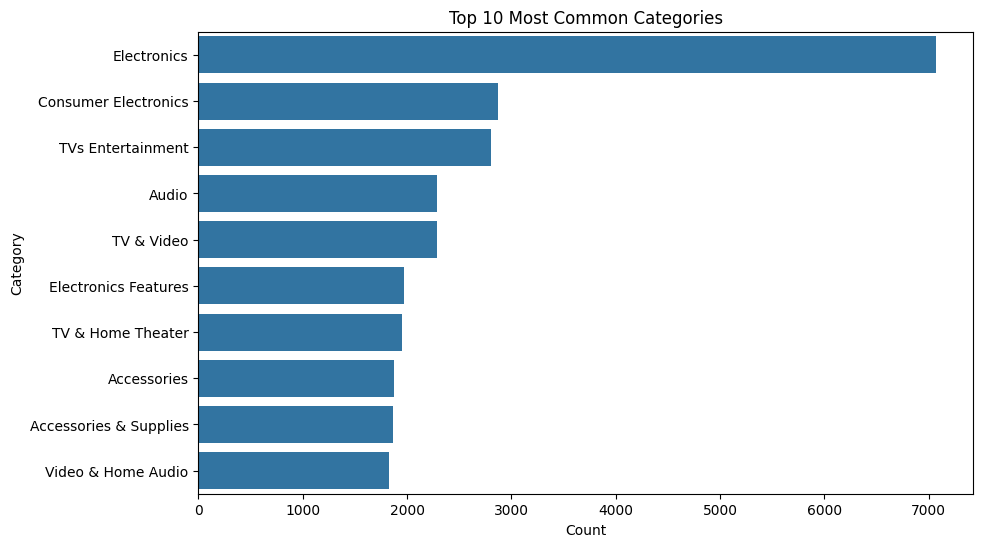

In [ ]:
# Most reviewed products
plt.figure(figsize=(10, 6))
sns.barplot(x=most_reviewed_products.values, y=most_reviewed_products.index)
plt.title('Top 10 Most Reviewed Products')
plt.xlabel('Number of Reviews')
plt.ylabel('Product')
plt.show()

# Most active reviewers
plt.figure(figsize=(10, 6))
sns.barplot(x=most_active_reviewers.values, y=most_active_reviewers.index)
plt.title('Top 10 Most Active Reviewers')
plt.xlabel('Number of Reviews')
plt.ylabel('Reviewer')
plt.show()

# Most common categories
plt.figure(figsize=(10, 6))
sns.barplot(x=most_common_categories.values, y=most_common_categories.index)
plt.title('Top 10 Most Common Categories')
plt.xlabel('Count')
plt.ylabel('Category')
plt.show()


***
## Chapter 3:  Data Cleaning

###  Import Libraries

In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import jaccard_score
from scipy.stats import pearsonr

### Loading the Data

In [ ]:
# Load the data from Google Drive
pd.options.display.float_format = '{:.2f}'.format
file_path = '/content/drive/MyDrive/[DATA102] Final Project/DatafinitiElectronicsProductData.csv'
df_electronics = pd.read_csv(file_path)

### Removing the 'reviews.' prefix

In [ ]:
# Rename columns to remove 'reviews.' prefix
df_electronics.columns = df_electronics.columns.str.replace('reviews.', '', regex=False)

# Display the DataFrame
df_electronics.head()

,id,asins,brand,categories,colors,dateAdded,dateUpdated,dimension,ean,imageURLs,...,doRecommend,numHelpful,rating,sourceURLs,text,title,username,sourceURLs,upc,weight
0,AVpf3txeLJeJML43FN82,B0168YIWSI,Microsoft,"Electronics,Computers,Computer Accessories,Key...",Black,2015-11-13T12:28:09Z,2018-01-29T02:15:13Z,11.6 in x 8.5 in x 0.19 in,890000000000.00,https://i5.walmartimages.com/asr/2a41f6f0-844e...,...,True,0.00,5.00,http://reviews.bestbuy.com/3545/4562009/review...,"This keyboard is very easy to type on, but the...",Love the fingerprint reader,JNH1,https://www.walmart.com/ip/Microsoft-Surface-P...,890000000000.00,1.1 pounds
1,AVpf3txeLJeJML43FN82,B0168YIWSI,Microsoft,"Electronics,Computers,Computer Accessories,Key...",Black,2015-11-13T12:28:09Z,2018-01-29T02:15:13Z,11.6 in x 8.5 in x 0.19 in,890000000000.00,https://i5.walmartimages.com/asr/2a41f6f0-844e...,...,True,0.00,4.00,http://reviews.bestbuy.com/3545/4562009/review...,It's thin and light. I can type pretty easily ...,Nice,Appa,https://www.walmart.com/ip/Microsoft-Surface-P...,890000000000.00,1.1 pounds
2,AVpf3txeLJeJML43FN82,B0168YIWSI,Microsoft,"Electronics,Computers,Computer Accessories,Key...",Black,2015-11-13T12:28:09Z,2018-01-29T02:15:13Z,11.6 in x 8.5 in x 0.19 in,890000000000.00,https://i5.walmartimages.com/asr/2a41f6f0-844e...,...,True,0.00,4.00,http://reviews.bestbuy.com/3545/4562009/review...,I love the new design the keys are spaced well...,New,Kman,https://www.walmart.com/ip/Microsoft-Surface-P...,890000000000.00,1.1 pounds
3,AVpf3txeLJeJML43FN82,B0168YIWSI,Microsoft,"Electronics,Computers,Computer Accessories,Key...",Black,2015-11-13T12:28:09Z,2018-01-29T02:15:13Z,11.6 in x 8.5 in x 0.19 in,890000000000.00,https://i5.walmartimages.com/asr/2a41f6f0-844e...,...,True,0.00,5.00,http://reviews.bestbuy.com/3545/4562009/review...,Attached easily and firmly. Has a nice feel. A...,Nice keyboard,UpstateNY,https://www.walmart.com/ip/Microsoft-Surface-P...,890000000000.00,1.1 pounds
4,AVpf3txeLJeJML43FN82,B0168YIWSI,Microsoft,"Electronics,Computers,Computer Accessories,Key...",Black,2015-11-13T12:28:09Z,2018-01-29T02:15:13Z,11.6 in x 8.5 in x 0.19 in,890000000000.00,https://i5.walmartimages.com/asr/2a41f6f0-844e...,...,True,0.00,5.00,http://reviews.bestbuy.com/3545/4562009/review...,"Our original keyboard was okay, but did not ha...",Nice improvement,Glickster,https://www.walmart.com/ip/Microsoft-Surface-P...,890000000000.00,1.1 pounds


### Loading the Ratings data

In [ ]:
### Load the ratings data
df_ratings = df_electronics[['username','asins','name','rating']]
df_ratings

,username,asins,name,rating
0,JNH1,B0168YIWSI,Microsoft Surface Pro 4 Type Cover with Finger...,5.00
1,Appa,B0168YIWSI,Microsoft Surface Pro 4 Type Cover with Finger...,4.00
2,Kman,B0168YIWSI,Microsoft Surface Pro 4 Type Cover with Finger...,4.00
3,UpstateNY,B0168YIWSI,Microsoft Surface Pro 4 Type Cover with Finger...,5.00
4,Glickster,B0168YIWSI,Microsoft Surface Pro 4 Type Cover with Finger...,5.00
...,...,...,...,...
7294,daddyluv01,B00IAKLM54,Logitech 915-000224 Harmony Ultimate One 15-D...,4.00
7295,Dash001,"B005MJHFHK,B00VXW0J5A,B00OY50CZU",Round LCD/Projector Ceiling Plate - Black,4.00
7296,Anirban,"B005MJHFHK,B00VXW0J5A,B00OY50CZU",Round LCD/Projector Ceiling Plate - Black,4.00
7297,jbce,"B005MJHFHK,B00VXW0J5A,B00OY50CZU",Round LCD/Projector Ceiling Plate - Black,5.00


### Loading the Categories data data

In [ ]:
#Read items
df_categories = df_electronics[['asins','name','categories']]
df_categories

,asins,name,categories
0,B0168YIWSI,Microsoft Surface Pro 4 Type Cover with Finger...,"Electronics,Computers,Computer Accessories,Key..."
1,B0168YIWSI,Microsoft Surface Pro 4 Type Cover with Finger...,"Electronics,Computers,Computer Accessories,Key..."
2,B0168YIWSI,Microsoft Surface Pro 4 Type Cover with Finger...,"Electronics,Computers,Computer Accessories,Key..."
3,B0168YIWSI,Microsoft Surface Pro 4 Type Cover with Finger...,"Electronics,Computers,Computer Accessories,Key..."
4,B0168YIWSI,Microsoft Surface Pro 4 Type Cover with Finger...,"Electronics,Computers,Computer Accessories,Key..."
...,...,...,...
7294,B00IAKLM54,Logitech 915-000224 Harmony Ultimate One 15-D...,"Electronics,Accessories & Supplies,Audio & Vid..."
7295,"B005MJHFHK,B00VXW0J5A,B00OY50CZU",Round LCD/Projector Ceiling Plate - Black,"Office,Projectors & Presentation Equipment,Aud..."
7296,"B005MJHFHK,B00VXW0J5A,B00OY50CZU",Round LCD/Projector Ceiling Plate - Black,"Office,Projectors & Presentation Equipment,Aud..."
7297,"B005MJHFHK,B00VXW0J5A,B00OY50CZU",Round LCD/Projector Ceiling Plate - Black,"Office,Projectors & Presentation Equipment,Aud..."


### Cleaning the categories data

In [ ]:
# Replace 'and' with '&' in the 'categories' column
df_categories['categories'] = df_categories['categories'].str.replace('and', '&', regex=False)

# Split the 'categories' column by ','
df_categories['categories'] = df_categories['categories'].str.split(',')

df_categories.head()


<ipython-input-14-1e6f3256d4f9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_categories['categories'] = df_categories['categories'].str.replace('and', '&', regex=False)
<ipython-input-14-1e6f3256d4f9>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_categories['categories'] = df_categories['categories'].str.split(',')


,asins,name,categories
0,B0168YIWSI,Microsoft Surface Pro 4 Type Cover with Finger...,"[Electronics, Computers, Computer Accessories,..."
1,B0168YIWSI,Microsoft Surface Pro 4 Type Cover with Finger...,"[Electronics, Computers, Computer Accessories,..."
2,B0168YIWSI,Microsoft Surface Pro 4 Type Cover with Finger...,"[Electronics, Computers, Computer Accessories,..."
3,B0168YIWSI,Microsoft Surface Pro 4 Type Cover with Finger...,"[Electronics, Computers, Computer Accessories,..."
4,B0168YIWSI,Microsoft Surface Pro 4 Type Cover with Finger...,"[Electronics, Computers, Computer Accessories,..."


In [ ]:
# First let's make a copy of the df_categories
df_categories_final = df_categories.copy(deep=True)

# Let's iterate through movies_df, then append the movie genres as columns of 1s or 0s.
# 1 if that column contains movies in the genre at the present index and 0 if not.

x = []
for index, row in df_categories.iterrows():
    x.append(index)
    for categories in row['categories']:
       df_categories_final.at[index, categories] = 1

# Confirm that every row has been iterated and acted upon
print(len(x) == len(df_categories))

df_categories_final.head(3)

<ipython-input-15-75f3a601e7ac>:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_categories_final.at[index, categories] = 1
<ipython-input-15-75f3a601e7ac>:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_categories_final.at[index, categories] = 1
<ipython-input-15-75f3a601e7ac>:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented fr

True


<ipython-input-15-75f3a601e7ac>:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_categories_final.at[index, categories] = 1
<ipython-input-15-75f3a601e7ac>:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_categories_final.at[index, categories] = 1
<ipython-input-15-75f3a601e7ac>:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented fr

,asins,name,categories,Electronics,Computers,Computer Accessories,Keyboards,Mice & Joysticks,All Keyboards,Computers & Accessories,...,Projectors & Presentation Equipment,Audio Visual Presentation,TV St&s,Mounts & Furniture,Projector Mounts Accessories,Projector Mounts & Screens,Projector Mounts,Mounts Carts,Mounting Plates,Powerline Network Adapters
0,B0168YIWSI,Microsoft Surface Pro 4 Type Cover with Finger...,"[Electronics, Computers, Computer Accessories,...",1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,B0168YIWSI,Microsoft Surface Pro 4 Type Cover with Finger...,"[Electronics, Computers, Computer Accessories,...",1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,B0168YIWSI,Microsoft Surface Pro 4 Type Cover with Finger...,"[Electronics, Computers, Computer Accessories,...",1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


---
## Chapter 4: Recommender System  

### I. Content Based Filtering - Implicit Rating



**Building the Item Profile Matrix**

In [ ]:
# Remove duplicate ASINs
df_categories_final = df_categories_final.drop_duplicates(subset='asins')

# Fill NaN values with 0
df_categories_final = df_categories_final.fillna(0)

# Select only the desired columns and set 'asins' as the index
df_item = df_categories_final.drop(['name', 'categories'], axis=1).set_index('asins')

# Display the DataFrame to ensure duplicates are removed and NaNs are filled
df_item


,Electronics,Computers,Computer Accessories,Keyboards,Mice & Joysticks,All Keyboards,Computers & Accessories,Computer Accessories & Peripherals,Mice & Accessories,Computers & Tablets,...,Projectors & Presentation Equipment,Audio Visual Presentation,TV St&s,Mounts & Furniture,Projector Mounts Accessories,Projector Mounts & Screens,Projector Mounts,Mounts Carts,Mounting Plates,Powerline Network Adapters
asins,,,,,,,,,,,,,,,,,,,,,
B0168YIWSI,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
"B018K251JE,B00VILQKQ8",1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
B00C78VIUE,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
B075WKS4D8,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
B000YA33DC,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
B00505EZYW,1.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
B00WBS31OQ,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
"B0172DS3ME,B00NTJKAXG",1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
B00R5WGT2E,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


### **Finding the Top Reviewers**

In [ ]:
# Count the occurrences of each username
username_counts = df_electronics['username'].value_counts()

# Get the top 10 usernames with the highest counts
top_10_users = username_counts.head(10)

# Display the result
print(top_10_users)

username
ByAmazon Customer    63
Mike                 21
John                 16
Chris                14
James                13
Anonymous            13
Jeff                 12
Steve                11
Bill                 11
Dave                 11
Name: count, dtype: int64


In our dataset of over 7000 reviews, we identified the top five reviewers: "ByAmazon Customer" with 63 reviews, Mike with 21 reviews, John with 16 reviews, Chris with 14 reviews, and James with 13 reviews. Since "ByAmazon Customer" is a generic placeholder and doesn't provide specific user insights, we'll focus our recommendation efforts on Mike, our most active identifiable reviewer.

Mike's 21 reviews represent approximately 0.29% of the total reviews in the dataset. By analyzing his reviews, we can extract his preferences and interests to create personalized recommendations.

---
#### **1. Recommendation for User Mike**

In [ ]:
# Filter the DataFrame to show only rows where 'username' is 'Mike'
user_likes = df_ratings.query("`username` == 'Mike'")['asins']
user_likes

,asins
971,B000YA33DC
1064,B00505EZYW
1553,B00V631478
1726,B06XSGYCHC
2047,"B01LYGPB3J,B011QHAOWO"
2354,"B01J0BFAAO,B019Q88VAM"
2575,B007QOIP3M
3251,B071ZVQVFQ
3613,B01KUAMCWI
4484,"B00170HCOO,B001BBT7RY,B00170O1HK"


The above code shows the reviews of user Mike through the ASINS or Amazon Standard Identification Number. According to  VanAkker(2024), every product on the marketplace is given an Amazon ASIN, or Amazon Standard Identification Number, a unique 10-character identifier consisting of letters and digits. Managing the vast product inventory on Amazon requires this identification. It's also crucial to remember that ASINs are unique to each marketplace, meaning that if a product is offered on Amazon Germany, it could require a different ASIN than one listed on Amazon US.

In [ ]:
user_profile = df_item.loc[user_likes].mean(axis=0)
user_profile.head

<bound method NDFrame.head of Electronics                  1.00
Computers                    0.24
Computer Accessories         0.10
Keyboards                    0.05
 Mice & Joysticks            0.05
                             ... 
Projector Mounts & Screens   0.00
Projector Mounts             0.00
Mounts Carts                 0.00
Mounting Plates              0.00
Powerline Network Adapters   0.00
Length: 359, dtype: float64>

In [ ]:
user_profile.sort_values(ascending=False).head(10)

,0
Electronics,1.00
TVs Entertainment,0.52
TV & Video,0.48
Consumer Electronics,0.48
Accessories,0.48
TV & Home Theater,0.43
TV,0.43
Accessories & Supplies,0.43
Electronics Features,0.43
Video & Audio Accessories,0.43


---
The top 10 categories he favors are Electronics (with a perfect score of 1), TVs Entertainment, Consumer Electronics, TV & Video, Accessories, TV & Home Theater, TV, Accessories & Supplies, Electronics Features, and Video & Audio Accessories. It is evident from these rankings that Mike has a strong interest in television-related electronics. The consistently high ratings across these categories showa his focus on various aspects of TV-related electronics and accessories.

---

**Retrieving Similar Items**

In [ ]:
df_scores = df_categories_final.copy()
scores = cosine_similarity(df_item,user_profile.values.reshape(1,-1)).reshape(-1)
df_scores['similarity'] = scores
df_scores.head()

,asins,name,categories,Electronics,Computers,Computer Accessories,Keyboards,Mice & Joysticks,All Keyboards,Computers & Accessories,...,Audio Visual Presentation,TV St&s,Mounts & Furniture,Projector Mounts Accessories,Projector Mounts & Screens,Projector Mounts,Mounts Carts,Mounting Plates,Powerline Network Adapters,similarity
0,B0168YIWSI,Microsoft Surface Pro 4 Type Cover with Finger...,"[Electronics, Computers, Computer Accessories,...",1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.17
507,"B018K251JE,B00VILQKQ8",Boytone - 2500W 2.1-Ch. Home Theater System - ...,"[Electronics, Portable Audio & Video, Home Aud...",1.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.31
590,B00C78VIUE,Sanus VLF410B1 10-Inch Super Slim Full-Motion ...,"[Audio & Video Accessories, TV Mounts, TV Acce...",1.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.30
752,B075WKS4D8,Ultimate Ears MEGABLAST Portable Wi-Fi/Bluetoo...,"[Portable Bluetooth Speakers, Bluetooth & Wire...",1.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.23
852,B000YA33DC,Flipside 300 Backpack (Black),"[Photography, Photography Bags Cases, Camera B...",1.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.19


In [ ]:
df_scores_sorted = df_scores.sort_values('similarity', ascending=False)
df_scores_filtered = df_scores_sorted.query(f"asins not in {user_likes.values.tolist()} and similarity != 0")
df_scores_filtered.head(5).T

,3581,2724,507,590,2634
asins,B00TVFO08S,B005YXXS4I,"B018K251JE,B00VILQKQ8",B00C78VIUE,B01ETTL6LE
name,Acoustimass 6 Series V Home Theater Speaker Sy...,CRX-322 CD Receiver,Boytone - 2500W 2.1-Ch. Home Theater System - ...,Sanus VLF410B1 10-Inch Super Slim Full-Motion ...,SRS-ZR7 Wireless Speaker
categories,"[Surround Speakers, TV, Video & Home Audio, S...","[TV, Video & Home Audio, Receivers, Electroni...","[Electronics, Portable Audio & Video, Home Aud...","[Audio & Video Accessories, TV Mounts, TV Acce...","[Portable Bluetooth Speakers, Audio Docks & Mi..."
Electronics,1.00,1.00,1.00,1.00,1.00
Computers,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...
Projector Mounts,0.00,0.00,0.00,0.00,0.00
Mounts Carts,0.00,0.00,0.00,0.00,0.00
Mounting Plates,0.00,0.00,0.00,0.00,0.00
Powerline Network Adapters,0.00,0.00,0.00,0.00,0.00


---

For user "Mike," the top 5 recommended electronics, based content-based filtering, are as follows: the Acoustimass 6 Series V Home Theater Speaker System (Black), which leads with a similarity score of 0.39, followed by the CRX-322 CD Receiver, the Boytone - 2500W 2.1-Ch. Home Theater System - Black Diamond, the Sanus VLF410B1 10-Inch Super Slim Full-Motion Mount for 37 - 84 Inch TVs, and the SRS-ZR7 Wireless Speaker. All of these recommended products are within the electronics category and are specifically related to television.

---

Jaccard Simmilarity

In [ ]:
df_scores_filtered_bool = ~df_scores_filtered.isnull()
df_scores_filtered_bool

,asins,name,categories,Electronics,Computers,Computer Accessories,Keyboards,Mice & Joysticks,All Keyboards,Computers & Accessories,...,Audio Visual Presentation,TV St&s,Mounts & Furniture,Projector Mounts Accessories,Projector Mounts & Screens,Projector Mounts,Mounts Carts,Mounting Plates,Powerline Network Adapters,similarity
3581,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
2724,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
507,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
590,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
2634,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
5401,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
4240,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
4397,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
3480,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
5391,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True


In [ ]:
# Example assuming df_scores_filtered_bool is your DataFrame
score = jaccard_score(df_scores_filtered_bool.iloc[1], df_scores_filtered_bool.iloc[0])
print(score)


1.0


In [ ]:
df_scores_filtered_bool.apply(lambda x:jaccard_score(x,df_scores_filtered_bool.iloc[0]),axis=1).head()

,0
3581,1.00
2724,1.00
507,1.00
590,1.00
2634,1.00


In [ ]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

# Fill NaN values with 0 in the original DataFrame
df_scores_filtered_filled = df_scores_filtered.fillna(0)

# Select only the numerical columns for cosine similarity calculation
df_scores_filtered_numeric = df_scores_filtered_filled.select_dtypes(include=[np.number])

# Compute cosine similarity
similarity = cosine_similarity(df_scores_filtered_numeric, df_scores_filtered_numeric.iloc[[0]])
print(similarity)



[[1.        ]
 [0.52249923]
 [0.50750708]
 [0.1115359 ]
 [0.34566551]
 [0.45074725]
 [0.37179967]
 [0.39064   ]
 [0.61511499]
 [0.24820579]
 [0.24820579]
 [0.2263804 ]
 [0.2263804 ]
 [0.10961854]
 [0.23156445]
 [0.20915895]
 [0.20915895]
 [0.3427774 ]
 [0.10849761]
 [0.36081258]
 [0.19830116]
 [0.11025392]
 [0.15276134]
 [0.08593722]
 [0.12632063]
 [0.05802774]
 [0.07577776]
 [0.06876066]
 [0.1735243 ]
 [0.05669811]
 [0.06863661]
 [0.07278073]
 [0.07517797]
 [0.0702157 ]
 [0.05123156]
 [0.0018093 ]
 [0.00102856]]


---
### II. Content Based - Explicit Rating

#### **2. Recommendation for User John**

In [ ]:
user_id = 'John'
user_ratings = df_ratings.query(f"`username` == @user_id")['rating']
user_ratings

,rating
47,5.00
361,5.00
512,5.00
690,5.00
997,5.00
1121,4.00
1889,5.00
1987,4.00
2896,3.00
3209,5.00


In [ ]:
user_ratings.mean()

4.6875

Generally, "John" rates high with a 4.6875 mean out of the highest rating of 5.

**Apply ratings to Item Profile Mix**

In [ ]:
user_watched = df_ratings.query(f"`username` == @user_id")['asins']
df_item_rated = df_item.loc[user_watched] * user_ratings.values.reshape(-1, 1)
df_item_rated = df_item_rated.replace(0, np.nan)
df_item_rated.head()


,Electronics,Computers,Computer Accessories,Keyboards,Mice & Joysticks,All Keyboards,Computers & Accessories,Computer Accessories & Peripherals,Mice & Accessories,Computers & Tablets,...,Projectors & Presentation Equipment,Audio Visual Presentation,TV St&s,Mounts & Furniture,Projector Mounts Accessories,Projector Mounts & Screens,Projector Mounts,Mounts Carts,Mounting Plates,Powerline Network Adapters
asins,,,,,,,,,,,,,,,,,,,,,
B0168YIWSI,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
B0168YIWSI,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"B018K251JE,B00VILQKQ8",5.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
B00C78VIUE,5.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
B00505EZYW,5.00,5.00,NaN,NaN,NaN,NaN,5.00,NaN,NaN,5.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Computing User Profile**

In [ ]:
user_profile_rated = df_item_rated.mean (axis=0)
user_profile_rated = user_profile_rated.fillna(0)
user_profile_rated


,0
Electronics,4.69
Computers,4.50
Computer Accessories,4.75
Keyboards,5.00
Mice & Joysticks,5.00
All Keyboards,5.00
Computers & Accessories,4.60
Computer Accessories & Peripherals,5.00
Mice & Accessories,5.00
Computers & Tablets,4.67


In [ ]:
user_profile_rated.sort_values(ascending=False).head(50)

,0
Headphones,5.00
TV Accessories,5.00
Video Games,5.00
Gaming Mice,5.00
Mice,5.00
Wireless & Bluetooth Mice,5.00
Over-Ear Headphones,5.00
TV Ceiling & Wall Mounts,5.00
Accessories & Supplies,5.00
A/V Presentation,5.00


Unlike User "Mike", John has a preference for electronic accessories products.

In [ ]:
user_profile_rated.sort_values(ascending=False).tail()

,0
Components,0.00
Audio & Home Theatre,0.00
Receivers & Amplifiers,0.00
Home Audio Components,0.00
Powerline Network Adapters,0.00


The above categories are the categories the John does not like.

**Compute Similarity**

In [ ]:
df_scores_rated = df_categories_final.copy()
scores = cosine_similarity(df_item, user_profile_rated.values.reshape(1, -1)).reshape(-1)
df_scores_rated['similarity']= scores
df_scores_rated.head()


,asins,name,categories,Electronics,Computers,Computer Accessories,Keyboards,Mice & Joysticks,All Keyboards,Computers & Accessories,...,Audio Visual Presentation,TV St&s,Mounts & Furniture,Projector Mounts Accessories,Projector Mounts & Screens,Projector Mounts,Mounts Carts,Mounting Plates,Powerline Network Adapters,similarity
0,B0168YIWSI,Microsoft Surface Pro 4 Type Cover with Finger...,"[Electronics, Computers, Computer Accessories,...",1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.48
507,"B018K251JE,B00VILQKQ8",Boytone - 2500W 2.1-Ch. Home Theater System - ...,"[Electronics, Portable Audio & Video, Home Aud...",1.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.39
590,B00C78VIUE,Sanus VLF410B1 10-Inch Super Slim Full-Motion ...,"[Audio & Video Accessories, TV Mounts, TV Acce...",1.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.25
752,B075WKS4D8,Ultimate Ears MEGABLAST Portable Wi-Fi/Bluetoo...,"[Portable Bluetooth Speakers, Bluetooth & Wire...",1.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.23
852,B000YA33DC,Flipside 300 Backpack (Black),"[Photography, Photography Bags Cases, Camera B...",1.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.04


In [ ]:
df_scores_sorted = df_scores_rated.sort_values('similarity', ascending=False)
df_scores_filtered = df_scores_sorted.query(f"asins not in {user_likes.values.tolist()}")
df_scores_filtered.head(5).T


,0,3763,507,1109,2634
asins,B0168YIWSI,"B01MUG578I,B072MP2CFG","B018K251JE,B00VILQKQ8",B00WBS31OQ,B01ETTL6LE
name,Microsoft Surface Pro 4 Type Cover with Finger...,Sony SRSXB30/BLK XB30 Portable Wireless Speake...,Boytone - 2500W 2.1-Ch. Home Theater System - ...,iHome Rechargeable Splash Proof Stereo Bluetoo...,SRS-ZR7 Wireless Speaker
categories,"[Electronics, Computers, Computer Accessories,...","[Portable Bluetooth Speakers, Audio Docks & Mi...","[Electronics, Portable Audio & Video, Home Aud...","[Portable Bluetooth Speakers, Stereos, Compute...","[Portable Bluetooth Speakers, Audio Docks & Mi..."
Electronics,1.00,1.00,1.00,1.00,1.00
Computers,1.00,0.00,0.00,1.00,0.00
...,...,...,...,...,...
Projector Mounts,0.00,0.00,0.00,0.00,0.00
Mounts Carts,0.00,0.00,0.00,0.00,0.00
Mounting Plates,0.00,0.00,0.00,0.00,0.00
Powerline Network Adapters,0.00,0.00,0.00,0.00,0.00


---

For John, the top recommended products are the Microsoft Surface Pro 4 Type Cover with Fingerprint ID (similarity score: 0.48), the Sony SRS-XB30 Portable Wireless Speaker with Bluetooth, the Boytone 2500W 2.1-Ch Home Theater System - Black Diamond, the iHome Rechargeable Splash Proof Stereo Bluetooth Speaker - Black (IBT33BC), and the SRS-ZR7 Wireless Speaker.

All recommended products fall under the "electronics" category. Notably, the top recommendation is the Microsoft Surface Pro 4, which is a keyboard but is categorized under accessories. The remaining four recommended products are all speakers.

---

In [ ]:
# Products that the user John may not like
df_scores_filtered.sort_values('similarity').head(5).T

,5380,3694,5605,2737,2717
asins,B00009WCBT,B01CEAT9ZU,B00KGGK1J8,"B00Q397RJY,B005LKCDR2,B001447Z8Q",B00B7C07LC
name,Clarity - Super-Loud Phone Ringer - White,Sony MEXM100BT 160W RMS Marine CD Receiver wit...,Samsung Universal 3100mAh Portable External Ba...,Alpine,"Power Acoustik - Gothic Series 10"" Dual-Voice-..."
categories,"[Office, Office Technology, Phones & Accessori...","[Electronics, CD Players & Digital Media Recei...","[Accessories, Portable Power Banks, Portable C...","[stone products, electronics, Parts & Accessor...","[Auto & Tires, Auto Electronics, Car Speakers ..."
Electronics,0.00,1.00,0.00,0.00,1.00
Computers,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...
Projector Mounts,0.00,0.00,0.00,0.00,0.00
Mounts Carts,0.00,0.00,0.00,0.00,0.00
Mounting Plates,0.00,0.00,0.00,0.00,0.00
Powerline Network Adapters,0.00,0.00,0.00,0.00,0.00


The following are the products that John may not like.

---

### Content-based - Explicit Rating mean-subtraction variation

---



#### **3. Recommendation for User Chris**

In [ ]:
user_id = 'Chris'
user_ratings = df_ratings[df_ratings['username'] == user_id]['rating']
user_ratings

,rating
818,5.00
1601,5.00
2377,1.00
2499,5.00
4039,5.00
4224,5.00
5599,5.00
6336,5.00
6532,4.00
6609,5.00


In [ ]:
user_ratings.mean()

4.357142857142857

User "Chris", also rates high but a bit lower than User "John".

**Apply ratings to Item Profile Mix**

In [ ]:
user_watched = df_ratings.query(f"`username` == 'Chris'")['asins']
df_item_rated = df_item.loc[user_watched] * user_ratings.values.reshape(-1, 1)
df_item_rated = df_item_rated.replace(0, np.nan)
df_item_rated = df_item_rated - user_ratings.mean()
df_item_rated.head()

,Electronics,Computers,Computer Accessories,Keyboards,Mice & Joysticks,All Keyboards,Computers & Accessories,Computer Accessories & Peripherals,Mice & Accessories,Computers & Tablets,...,Projectors & Presentation Equipment,Audio Visual Presentation,TV St&s,Mounts & Furniture,Projector Mounts Accessories,Projector Mounts & Screens,Projector Mounts,Mounts Carts,Mounting Plates,Powerline Network Adapters
asins,,,,,,,,,,,,,,,,,,,,,
B075WKS4D8,0.64,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
B00V631478,0.64,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"B01J0BFAAO,B019Q88VAM",-3.36,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
B004OVE61U,0.64,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"B01MUG578I,B072MP2CFG",0.64,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Computing User Profile**

In [ ]:
user_profile_rated = df_item_rated.mean (axis=0)
user_profile_rated = user_profile_rated.fillna(0)
user_profile_rated

,0
Electronics,0.00
Computers,0.64
Computer Accessories,0.00
Keyboards,0.00
Mice & Joysticks,0.00
All Keyboards,0.00
Computers & Accessories,0.64
Computer Accessories & Peripherals,0.00
Mice & Accessories,0.00
Computers & Tablets,0.00


In [ ]:
user_profile_rated.sort_values(ascending=False).head(30)

,0
All Bluetooth & Wireless Speakers,0.64
Portable Wireless & Bluetooth Speakers,0.64
Speakers,0.64
Shortwave Radios,0.64
Radios,0.64
Radios & Boomboxes,0.64
Docks,0.64
All Portable Speakers,0.64
MP3 Accessories,0.64
Portable Audio,0.64


For User Chris, he appears to have a preference for Car Accessories.

---



In [ ]:
user_profile_rated.sort_values(ascending=True).head()

,0
Used:Portable Audio,-3.36
Sony SRS-HG1,-3.36
Used:Speakers,-3.36
Audio Speakers,-3.36
All Home Speakers,-3.36


The following are the catagories that Chris may not like.

**Compute Similarity**

In [ ]:
df_scores_rated = df_categories_final.copy()
scores = cosine_similarity(df_item, user_profile_rated.values.reshape(1, -1)).reshape(-1)
df_scores_rated['similarity']= scores
df_scores_rated.head().T

,0,507,590,752,852
asins,B0168YIWSI,"B018K251JE,B00VILQKQ8",B00C78VIUE,B075WKS4D8,B000YA33DC
name,Microsoft Surface Pro 4 Type Cover with Finger...,Boytone - 2500W 2.1-Ch. Home Theater System - ...,Sanus VLF410B1 10-Inch Super Slim Full-Motion ...,Ultimate Ears MEGABLAST Portable Wi-Fi/Bluetoo...,Flipside 300 Backpack (Black)
categories,"[Electronics, Computers, Computer Accessories,...","[Electronics, Portable Audio & Video, Home Aud...","[Audio & Video Accessories, TV Mounts, TV Acce...","[Portable Bluetooth Speakers, Bluetooth & Wire...","[Photography, Photography Bags Cases, Camera B..."
Electronics,1.00,1.00,1.00,1.00,1.00
Computers,1.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...
Projector Mounts,0.00,0.00,0.00,0.00,0.00
Mounts Carts,0.00,0.00,0.00,0.00,0.00
Mounting Plates,0.00,0.00,0.00,0.00,0.00
Powerline Network Adapters,0.00,0.00,0.00,0.00,0.00


In [ ]:
df_scores_sorted = df_scores_rated.sort_values('similarity', ascending=False)
df_scores_filtered = df_scores_sorted.query(f"asins not in {user_likes.values.tolist()}")
df_scores_filtered.head(5).T

,2490,4606,1411,3694,2717
asins,B004OVE61U,B0038NMC8O,B00R5WGT2E,B01CEAT9ZU,B00B7C07LC
name,"Midland Weather Alert Radio, 1.0 CT","Alpine - 6-1/2"" 2-Way Coaxial Car Speakers wit...",JVC KD-X320BTS Apple iPod and Android Digital ...,Sony MEXM100BT 160W RMS Marine CD Receiver wit...,"Power Acoustik - Gothic Series 10"" Dual-Voice-..."
categories,"[Electronics, Portable Audio, MP3 Accessories,...","[Auto & Tires, Auto Electronics, Car Speakers ...","[Electronics, Portable Audio, Auto & Tires, Au...","[Electronics, CD Players & Digital Media Recei...","[Auto & Tires, Auto Electronics, Car Speakers ..."
Electronics,1.00,1.00,1.00,1.00,1.00
Computers,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...
Projector Mounts,0.00,0.00,0.00,0.00,0.00
Mounts Carts,0.00,0.00,0.00,0.00,0.00
Mounting Plates,0.00,0.00,0.00,0.00,0.00
Powerline Network Adapters,0.00,0.00,0.00,0.00,0.00


---

The top 5 recommended products for Chris are the Midland Weather Alert Radio, the Alpine 6-1/2" 2-Way Coaxial Car Speakers with Polypropylene Cones (Pair) - Black, the JVC KD-X320BTS Apple iPod and Android Digital Media Receiver with Bluetooth, the Sony MEX-M100BT 160W RMS Marine CD Receiver with Bluetooth (Black) and SiriusXM Ready, and the Power Acoustik Gothic Series 10" Dual-Voice-Coil 2-Ohm Subwoofer - Black. It is noteworthy that most of these recommended products are related to automotive accessories which is similar with the User Profile.

---

In [ ]:
# Products that the user Chris may not like
df_scores_filtered.sort_values('similarity').head(5).T

,2634,3480,4240,5398,4397
asins,B01ETTL6LE,B001AVRD62,B00IWQ3YPC,B00L2EWRW2,B000O3TFWW
name,SRS-ZR7 Wireless Speaker,NS-SP1800BL 5.1-Channel Home Theater System (B...,Sony LBT-GPX555 Mini-System with Bluetooth and...,Kicker 41IK5BT2V2 Amphitheater High-Performanc...,NS-IW480CWH In-Ceiling 8 Natural Sound Three-W...
categories,"[Portable Bluetooth Speakers, Audio Docks & Mi...","[Surround Speakers, Electronics Features, Surr...","[Electronics, Home Audio & Theater, Home Theat...","[Electronics, Home Audio & Theater, Home Audio...","[In-Wall & In-Ceiling Speakers, Electronics, I..."
Electronics,1.00,1.00,1.00,1.00,1.00
Computers,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...
Projector Mounts,0.00,0.00,0.00,0.00,0.00
Mounts Carts,0.00,0.00,0.00,0.00,0.00
Mounting Plates,0.00,0.00,0.00,0.00,0.00
Powerline Network Adapters,0.00,0.00,0.00,0.00,0.00


---
### III. Collaborative Based Filtering - User Based

---
#### **4. Recommendation for User James**

**Build User-Item Matrix**

In [ ]:
user_id1 = 'James'

In [ ]:
# Remove duplicates by aggregating the ratings (e.g., taking the mean rating)
df_ratings1 = df_ratings.groupby(['username', 'asins'], as_index=False)['rating'].mean()

In [ ]:
# Pivot the DataFrame
df_user1 = df_ratings1.pivot(index='username', columns='asins', values='rating')
df_user1

asins,B00009WCBT,B000O3TFWW,B000YA33DC,"B00170HCOO,B001BBT7RY,B00170O1HK",B001AVRD62,B0038NMC8O,B004OVE61U,B00505EZYW,"B005MJHFHK,B00VXW0J5A,B00OY50CZU",B005YXXS4I,...,"B01J0BFAAO,B019Q88VAM",B01KUAMCWI,"B01LYGPB3J,B011QHAOWO","B01MUG578I,B072MP2CFG",B06XSGYCHC,B06XVDYHQX,B071ZVQVFQ,B073JHHNJ9,B0742RMVQ8,B075WKS4D8
username,,,,,,,,,,,,,,,,,,,,,
007Shaii,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.00
09octavius,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1080p,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1233Studio,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.00,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1234,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
youvegotmoxie,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.00,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
yuxx0051,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
zilla,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Retrive k most similar users**

**Preprocessing-Mean Imputation**

In [ ]:
df_user_filled1 = df_user1.apply(lambda x: x.fillna(x.mean()), axis=1)
df_user_filled1.head()

asins,B00009WCBT,B000O3TFWW,B000YA33DC,"B00170HCOO,B001BBT7RY,B00170O1HK",B001AVRD62,B0038NMC8O,B004OVE61U,B00505EZYW,"B005MJHFHK,B00VXW0J5A,B00OY50CZU",B005YXXS4I,...,"B01J0BFAAO,B019Q88VAM",B01KUAMCWI,"B01LYGPB3J,B011QHAOWO","B01MUG578I,B072MP2CFG",B06XSGYCHC,B06XVDYHQX,B071ZVQVFQ,B073JHHNJ9,B0742RMVQ8,B075WKS4D8
username,,,,,,,,,,,,,,,,,,,,,
007Shaii,4.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00,...,4.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00
09octavius,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,...,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00
1080p,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,...,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00
1233Studio,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,...,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00
1234,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,...,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00


In [ ]:
# Drop rows with any NaN or inf values
df_user_filled1 = df_user_filled1.dropna()

**Similarity Computation**

In [ ]:
k = 10
reference_user = df_user_filled1.loc[user_id1]
user_similarities = df_user_filled1.apply(lambda x: pearsonr(x, reference_user)[0], axis=1)
similar_users = user_similarities.drop(user_id1, axis=0).nlargest(k)
similar_users


<ipython-input-50-817d2146b589>:3: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  user_similarities = df_user_filled1.apply(lambda x: pearsonr(x, reference_user)[0], axis=1)


,0
username,
Joey,0.82
Chris,0.73
Will,0.72
Billy,0.69
Michael,0.66
Stew,0.59
Brian,0.38
Pablo,0.34
mafb1993,0.24


The most similar users to James are Joey, Chris, Will, and Billy with all having a similarity of more than 0.6

**Get average rating of similar users**

In [ ]:
predicted_ratings = df_user1.loc[similar_users.index].mean().sort_values(ascending=False)
predicted_ratings.head(20)

,0
asins,
B00V631478,5.00
"B01LYGPB3J,B011QHAOWO",5.00
B004OVE61U,5.00
B00505EZYW,5.00
B007QOIP3M,5.00
B009AEMB6I,5.00
B00F6PRSMW,5.00
B071ZVQVFQ,5.00
B00R5WGT2E,5.00


**Recommend Items**

In [ ]:
user_unrated_items = df_user1.loc[user_id1].isna()
recommended_items = predicted_ratings[user_unrated_items].head(10)
recommended_items

,0
asins,
B00V631478,5.00
"B01LYGPB3J,B011QHAOWO",5.00
B004OVE61U,5.00
B00505EZYW,5.00
B007QOIP3M,5.00
B009AEMB6I,5.00
B071ZVQVFQ,5.00
B001AVRD62,5.00
B01AEW9E46,5.00


**How other users rated those items:**

In [ ]:
df_user1.loc[similar_users.index, recommended_items.index]

asins,B00V631478,"B01LYGPB3J,B011QHAOWO",B004OVE61U,B00505EZYW,B007QOIP3M,B009AEMB6I,B071ZVQVFQ,B001AVRD62,B01AEW9E46,B00IAKLM54
username,,,,,,,,,,
Joey,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.00,5.00,NaN
Chris,5.00,NaN,5.00,NaN,NaN,NaN,NaN,NaN,NaN,4.29
Will,NaN,5.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Billy,NaN,NaN,NaN,5.00,NaN,5.00,NaN,NaN,NaN,NaN
Michael,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.00,4.50
Stew,NaN,NaN,NaN,NaN,5.00,NaN,NaN,NaN,NaN,NaN
Brian,NaN,NaN,NaN,NaN,NaN,NaN,5.00,NaN,5.00,NaN
Pablo,NaN,5.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mafb1993,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.00,NaN


**Variation: Get weighted average of similar users**

In [ ]:
def get_weighted_similarity(x):
    weighted_similarity = x*similar_users
    norm = similar_users[~weighted_similarity.isna()].sum()
    rating = weighted_similarity.sum()/norm
    return rating

predicted_ratings = df_user1.loc[similar_users.index].apply(get_weighted_similarity, axis=0)
predicted_ratings = predicted_ratings.sort_values(ascending=False)
predicted_ratings

<ipython-input-58-bb51b25d6a51>:4: RuntimeWarning: invalid value encountered in scalar divide
  rating = weighted_similarity.sum()/norm


,0
asins,
"B01LYGPB3J,B011QHAOWO",5.00
B00V631478,5.00
B004OVE61U,5.00
B00505EZYW,5.00
B007QOIP3M,5.00
B009AEMB6I,5.00
B00F6PRSMW,5.00
B00R5WGT2E,5.00
B001AVRD62,5.00


**Recommend Items**

In [ ]:
user_unrated_items = df_user1.loc[user_id].isna()
recommended_items = predicted_ratings[user_unrated_items].head(10)
recommended_items

,0
asins,
"B01LYGPB3J,B011QHAOWO",5.00
B00505EZYW,5.00
B007QOIP3M,5.00
B009AEMB6I,5.00
B00F6PRSMW,5.00
B00R5WGT2E,5.00
B001AVRD62,5.00
B01AEW9E46,5.00
B071ZVQVFQ,5.00


**How other users rated those items:**

In [ ]:
df_user1.loc[similar_users.index, recommended_items.index]

asins,"B01LYGPB3J,B011QHAOWO",B00505EZYW,B007QOIP3M,B009AEMB6I,B00F6PRSMW,B00R5WGT2E,B001AVRD62,B01AEW9E46,B071ZVQVFQ,B0168YIWSI
username,,,,,,,,,,
Joey,NaN,NaN,NaN,NaN,NaN,NaN,5.00,5.00,NaN,5.00
Chris,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Will,5.00,NaN,NaN,NaN,NaN,5.00,NaN,NaN,NaN,5.00
Billy,NaN,5.00,NaN,5.00,NaN,NaN,NaN,NaN,NaN,NaN
Michael,NaN,NaN,NaN,NaN,5.00,NaN,NaN,5.00,NaN,NaN
Stew,NaN,NaN,5.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Brian,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.00,5.00,4.67
Pablo,5.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.00
mafb1993,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.00,NaN,NaN


---
### III. Collaborative Based Filtering - Item Based

**Build User-Item Matrix**

In [ ]:
user_id2 = 'Jeff'
item_id2 = 'B00009WCBT'

In [ ]:
df_item2 = df_ratings.pivot_table(index='asins', columns='username', values='rating', aggfunc='mean')
df_item2

username,007Shaii,09octavius,1080p,1233Studio,1234,128Gold,12AMWhistler,12packmax,13igtymer,15thpaladin,...,yaya,yoda37,yogi,youdontknowme,yourkidding,youvegotmoxie,yuxx0051,zilla,zombiepie69-7,zznj
asins,,,,,,,,,,,,,,,,,,,,,
B00009WCBT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
B000O3TFWW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
B000YA33DC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"B00170HCOO,B001BBT7RY,B00170O1HK",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
B001AVRD62,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
B0038NMC8O,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
B004OVE61U,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
B00505EZYW,NaN,NaN,NaN,5.00,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,5.00,NaN,NaN,NaN,NaN
"B005MJHFHK,B00VXW0J5A,B00OY50CZU",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## **Retrieve k-most similar items**


**Preprocessing-Mean Imputation**

In [ ]:
df_item_filled2 = df_item2.apply(lambda x: x.fillna(x.mean()), axis=1)
df_item_filled2.head()

username,007Shaii,09octavius,1080p,1233Studio,1234,128Gold,12AMWhistler,12packmax,13igtymer,15thpaladin,...,yaya,yoda37,yogi,youdontknowme,yourkidding,youvegotmoxie,yuxx0051,zilla,zombiepie69-7,zznj
asins,,,,,,,,,,,,,,,,,,,,,
B00009WCBT,4.91,4.91,4.91,4.91,4.91,4.91,4.91,4.91,4.91,4.91,...,4.91,4.91,4.91,4.91,4.91,4.91,4.91,4.91,4.91,4.91
B000O3TFWW,4.80,4.80,4.80,4.80,4.80,4.80,4.80,4.80,4.80,4.80,...,4.80,4.80,4.80,4.80,4.80,4.80,4.80,4.80,4.80,4.80
B000YA33DC,4.63,4.63,4.63,4.63,4.63,4.63,4.63,4.63,4.63,4.63,...,4.63,4.63,4.63,4.63,4.63,4.63,4.63,4.63,4.63,4.63
"B00170HCOO,B001BBT7RY,B00170O1HK",4.85,4.85,4.85,4.85,4.85,4.85,4.85,4.85,4.85,4.85,...,4.85,4.85,4.85,4.85,4.85,4.85,4.85,4.85,4.85,4.85
B001AVRD62,4.60,4.60,4.60,4.60,4.60,4.60,4.60,4.60,4.60,4.60,...,4.60,4.60,4.60,4.60,4.60,4.60,4.60,4.60,4.60,4.60


In [ ]:
k = 10
reference_item = df_item_filled2.loc[item_id]
item_similarities = df_item_filled2.apply(lambda x: pearsonr(x, reference_item)[0], axis=1)
user_rated_items = df_item2.loc[:, user_id].dropna().index.tolist()
item_similarities = item_similarities.drop(item_id, axis=0).loc[user_rated_items]
similar_items = item_similarities.nlargest(k)
# Display the similarities with 10 decimal places
similar_items = similar_items.apply(lambda x: f"{x:.30f}")
similar_items.head()

<ipython-input-86-6c169eb1c178>:3: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  item_similarities = df_item_filled2.apply(lambda x: pearsonr(x, reference_item)[0], axis=1)


,0
asins,
"B0172DS3ME,B00NTJKAXG",0.000000000000000000000000000542
B00WBS31OQ,0.000000000000000000000000000432
B0168YIWSI,0.000000000000000000000000000287
B01AEW9E46,0.000000000000000000000000000284
B00R5WGT2E,-0.000000000000000000000000000004


**Get weighted average of similar items**




This is how `user_id = Jeff` will rate `asin = B00009WCBT`

In [ ]:
df_similar_items = df_item2.loc[similar_items.index, user_id]
df_similar_items

,Jeff
asins,
"B0172DS3ME,B00NTJKAXG",5.00
B00WBS31OQ,5.00
B0168YIWSI,5.00
B01AEW9E46,4.50
B00R5WGT2E,5.00
B00IAKLM54,3.67
B00505EZYW,5.00


In [ ]:
def get_item_weighted_similarity(x):
    # Ensure x and similar_items are numerical types
    x = pd.to_numeric(x, errors='coerce')
    df_similar_items = pd.to_numeric(similar_items, errors='coerce')

    # Calculate weighted similarity
    weighted_similarity = x * similar_items
    norm = df_similar_items[~weighted_similarity.isna()].sum()
    rating = weighted_similarity.sum() / norm if norm != 0 else np.nan
    return rating

# Example usage (assuming df_similar_items is a DataFrame or Series)
get_item_weighted_similarity(df_similar_items)





4.784757118927973

### Latent Factors Model

**Train-Test Split**

In [ ]:
from sklearn.model_selection import train_test_split

train_size = 0.6

# shuffledset = df_ratings.sample(frac=1, random_state=42)
trainset, testset = train_test_split(df_ratings, train_size=train_size, random_state=42)
trainset.shape, testset.shape

((4379, 4), (2920, 4))

In [ ]:
import pandas as pd
import numpy as np

# Create pivot tables with mean aggregation to handle duplicates
train_matrix = trainset.pivot_table(index='username', columns='asins', values='rating', aggfunc='mean')
test_matrix = testset.pivot_table(index='username', columns='asins', values='rating', aggfunc='mean')

# Identify columns to drop and add
train_items = set(train_matrix.columns)
test_items = set(test_matrix.columns)
test_items_to_drop = test_items - train_items
train_items_not_in_test = train_items - test_items

# Drop columns in test_matrix that are not in train_matrix
test_matrix = test_matrix.drop(test_items_to_drop, axis=1)

# Add columns to test_matrix that are in train_matrix but not in test_matrix, with NaN values
test_matrix_pad = pd.DataFrame(np.nan, columns=list(train_items_not_in_test), index=test_matrix.index)
test_matrix = pd.concat([test_matrix, test_matrix_pad], axis=1)

# Sort the test_matrix to match the train_matrix columns order
test_matrix = test_matrix[train_matrix.columns]
test_matrix.sort_index(inplace=True)
test_matrix.columns.name = 'asins'

# Display shapes of matrices
train_matrix.shape, test_matrix.shape


((3934, 49), (2663, 49))

In [ ]:
def check_not_null_count(values:np.array):
    return np.isfinite(values).sum()

print('Train Set Not Nulls:')
print(check_not_null_count(train_matrix.values))

print('Test Set Not Nulls:')
print(check_not_null_count(test_matrix.values))

Train Set Not Nulls:
4168
Test Set Not Nulls:
2793


In [ ]:
print(f'Non-null values: {check_not_null_count(train_matrix.values) / (train_matrix.shape[0]*train_matrix.shape[1]):.3%}')

Non-null values: 2.162%


The dataset only has 2.162% non-null values

### Singular Value Decomposition

In [ ]:
matrix_imputed = train_matrix.apply(lambda x: x.fillna(x.mean()), axis=1)
matrix_imputed = train_matrix.fillna(0)
u, s, vh = np.linalg.svd(matrix_imputed, full_matrices=False)
u.shape, s.shape, vh.shape

((3934, 49), (49,), (49, 49))

In [ ]:
factors = 100
reconstructed_matrix = u[:, :factors] @ np.diag(s[:factors]) @ vh[:factors, :]
reconstructed_matrix.shape

(3934, 49)

**Train Set Scores**

In [ ]:
train_ratings = train_matrix.reset_index().melt(id_vars=['username'])
train_ratings.rename({'value':'actual'}, inplace=True, axis=1)
train_ratings['pred'] = reconstructed_matrix.T.flatten()
train_ratings

,username,asins,actual,pred
0,007Shaii,B00009WCBT,NaN,0.00
1,1080p,B00009WCBT,NaN,0.00
2,1234,B00009WCBT,NaN,0.00
3,12AMWhistler,B00009WCBT,NaN,0.00
4,12packmax,B00009WCBT,NaN,0.00
...,...,...,...,...
192761,yoda37,B075WKS4D8,NaN,-0.00
192762,youdontknowme,B075WKS4D8,NaN,0.00
192763,yourkidding,B075WKS4D8,NaN,0.00
192764,youvegotmoxie,B075WKS4D8,NaN,0.00


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

print(f"Original Size: {train_ratings.shape[0]}")
train_ratings_filtered = train_ratings.dropna()
print(f"After Filtering Nulls Size: {train_ratings_filtered.shape[0]}")
rmse = mean_squared_error(train_ratings_filtered['actual'], train_ratings_filtered['pred'], squared=False)
print(f'RMSE: {rmse}')
mae = mean_absolute_error(train_ratings_filtered['actual'], train_ratings_filtered['pred'])
print(f'MAE: {mae}')

Original Size: 192766
After Filtering Nulls Size: 4168
RMSE: 4.60731130124707e-15
MAE: 3.5553240880234676e-15


**Test Set Scores**

In [ ]:
# Ensure that reconstructed_matrix matches the shape of test_matrix
reconstructed_matrix_subset = reconstructed_matrix[:test_matrix.shape[0], :test_matrix.shape[1]]

# Flatten the subset of reconstructed_matrix
flattened_pred = reconstructed_matrix_subset.T.flatten()

In [ ]:
# Flatten the aligned reconstructed matrix
flattened_pred = reconstructed_matrix_subset.T.flatten()
flattened_length = flattened_pred.shape[0]

# Check for length mismatch
expected_length = test_ratings.shape[0]
if flattened_length != expected_length:
    raise ValueError(f"Length mismatch: Flattened array length ({flattened_length}) does not match DataFrame length ({expected_length})")

# Assign predictions
test_ratings['pred'] = flattened_pred

# Print sizes and calculate metrics
print(f"Original Size: {test_ratings.shape[0]}")
test_ratings_filtered = test_ratings.dropna()
print(f"After Filtering Nulls Size: {test_ratings_filtered.shape[0]}")

rmse = mean_squared_error(test_ratings_filtered['actual'], test_ratings_filtered['pred'], squared=False)
print(f'RMSE: {rmse}')

mae = mean_absolute_error(test_ratings_filtered['actual'], test_ratings_filtered['pred'])
print(f'MAE: {mae}')


Original Size: 130487
After Filtering Nulls Size: 2793
RMSE: 4.334956361761377
MAE: 4.109162813081229


### Non-Negative Value Decomposition

In [ ]:
from sklearn.decomposition import non_negative_factorization

matrix_imputed = train_matrix.apply(lambda x: x.fillna(x.mean()), axis=1)
matrix_imputed = train_matrix.fillna(0)
W, H, n_iter = non_negative_factorization(matrix_imputed, n_components=100,
                                          init='random', random_state=0, max_iter=200)
W.shape, H.shape, n_iter

((3934, 100), (100, 49), 7)

In [ ]:
reconstructed_matrix = W @ H
reconstructed_matrix.shape

(3934, 49)

**Train Set Scores**

In [ ]:
train_ratings = train_matrix.reset_index().melt(id_vars=['username'])
train_ratings.rename({'value':'actual'}, inplace=True, axis=1)
train_ratings['pred'] = reconstructed_matrix.T.flatten()

print(f"Original Size: {train_ratings.shape[0]}")
train_ratings_filtered = train_ratings.dropna()
print(f"After Filtering Nulls Size: {train_ratings_filtered.shape[0]}")
rmse = mean_squared_error(train_ratings_filtered['actual'], train_ratings_filtered['pred'], squared=False)
print(f'RMSE: {rmse}')
mae = mean_absolute_error(train_ratings_filtered['actual'], train_ratings_filtered['pred'])
print(f'MAE: {mae}')

Original Size: 192766
After Filtering Nulls Size: 4168
RMSE: 0.07750114168967323
MAE: 0.001516255125470306


**Test Set Scores**

In [ ]:
# Adjust reconstructed_matrix to match the dimensions of test_matrix
if reconstructed_matrix.shape[0] > test_matrix.shape[0]:
    reconstructed_matrix_subset = reconstructed_matrix[:test_matrix.shape[0], :test_matrix.shape[1]]
else:
    reconstructed_matrix_subset = reconstructed_matrix

# Flatten the subset
flattened_pred = reconstructed_matrix_subset.T.flatten()
flattened_length = flattened_pred.shape[0]


# Check length of test_ratings
test_ratings = test_matrix.reset_index().melt(id_vars=['username'])
test_ratings.rename({'value': 'actual'}, inplace=True, axis=1)

# Ensure lengths match
if len(flattened_pred) != len(test_ratings):
    raise ValueError(f"Length mismatch: Flattened subset length ({len(flattened_pred)}) does not match test_ratings length ({len(test_ratings)})")

# Assign predictions
test_ratings['pred'] = flattened_pred

# Print sizes and calculate metrics
print(f"Original Size: {test_ratings.shape[0]}")
test_ratings_filtered = test_ratings.dropna()
print(f"After Filtering Nulls Size: {test_ratings_filtered.shape[0]}")

rmse = mean_squared_error(test_ratings_filtered['actual'], test_ratings_filtered['pred'], squared=False)
print(f'RMSE: {rmse}')

mae = mean_absolute_error(test_ratings_filtered['actual'], test_ratings_filtered['pred'])
print(f'MAE: {mae}')

Original Size: 130487
After Filtering Nulls Size: 2793
RMSE: 4.334956361761377
MAE: 4.109162813081229


---
## Chapter 5: Clustering
Modeling What modeling techniques have you used? Light discussion on the models used. What biases/assumptions/limitations do the algorithms/models have? Explain why certain models were used. Explain results. Explain why certain metrics were used for evaluating the models. Show the following: test set scores for recommender system, classification, and regression use cases or clustering performance (no test set) for clustering use case.
support, lift, and confidence for association rule learning.
Was there anything surprising about the results?

Modeling Techniques Used:

KMeans Clustering: a widely used unsupervised learning algorithm for clustering data points into K clusters based on their similarities. Principal Component Analysis (PCA): a dimensionality reduction technique used to visualize high-dimensional data in a lower-dimensional space. Biases/Assumptions/Limitations:

KMeans Clustering assumes that the data is spherical and well-separated, which may not always be the case. KMeans Clustering is sensitive to the choice of initial centroids and may converge to local optima. PCA assumes that the data is linearly correlated, which may not always be the case. Why Certain Models Were Used:

The optimal number of clusters is determined based on the silhouette score, which measures the separation between clusters and the cohesion within clusters. The inertia, silhouette score, Calinski-Harabasz score, and Davies-Bouldin score are calculated to evaluate the quality of the clustering. The clustering results are visualized using PCA to reduce the dimensionality of the data. Metrics Used for Evaluating the Models:

Silhouette Score: measures the separation between clusters and the cohesion within clusters. Calinski-Harabasz Score: measures the ratio of between-cluster variance to within-cluster variance. Davies-Bouldin Score: measures the similarity between clusters based on their centroid distances and scatter within the clusters. Inertia: measures the sum of squared distances of samples to their closest cluster center. Surprising Results:

The optimal number of clusters may not always be the expected number of clusters based on prior knowledge or domain expertise. The clustering results may reveal unexpected patterns or structures in the data that were not apparent before.

As for the clustering results, the optimal number of clusters is 9, with an inertia of 3908.13, a silhouette score of 0.59, a Calinski-Harabasz score of 5896.31, and a Davies-Bouldin score of 0.65. These scores suggest that the clustering is reasonably good, with well-separated and cohesive clusters.

To interpret each cluster, you can analyze the data points within each cluster and identify common patterns or characteristics. For example, you can calculate the mean price, rating, and helpfulness for each cluster, as well as the most common categories within each cluster. You can also visualize the distribution of ratings and prices within each cluster to get a better understanding of the characteristics of each cluster.

Based on the analysis, you can interpret each cluster and use it to inform product recommendations, marketing strategies, or other business decisions. For example, you could recommend products within a particular cluster to customers who are looking for products with similar characteristics. Alternatively, you could target customers in a particular cluster with marketing campaigns that emphasize the benefits of the products in that cluster. By understanding the characteristics of each cluster, you can make more informed decisions and improve the customer experience.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

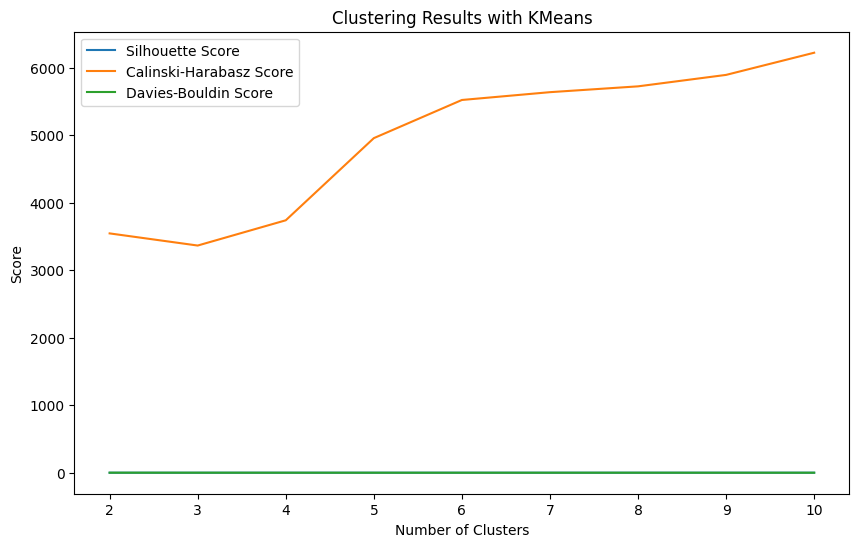

Optimal number of clusters: 9
Inertia: 3908.1316666270295


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Silhouette Score: 0.5912073547498151
Calinski-Harabasz Score: 5896.313631284318
Davies-Bouldin Score: 0.6486275138674134


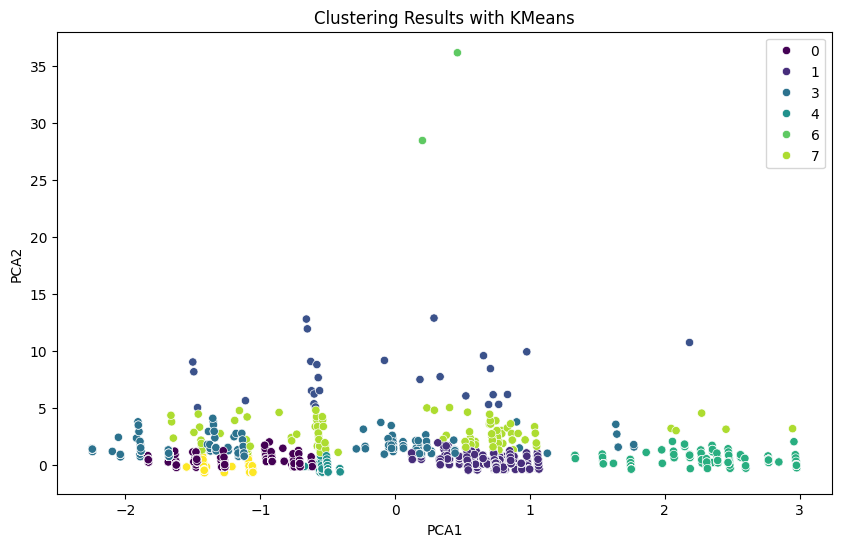

In [ ]:
# Import necessary libraries
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

# Load the data from Google Drive
file_path = '/content/drive/MyDrive/[DATA102] Final Project/DatafinitiElectronicsProductData.csv'
data = pd.read_csv(file_path)

# Select numeric columns only
numeric_data = data.select_dtypes(include=[np.number])

# Impute missing values
imputer = SimpleImputer(strategy='mean')
imputed_data = imputer.fit_transform(numeric_data)

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(imputed_data)

# Define a range of cluster numbers to try
n_clusters_range = range(2, 11)

# Initialize lists to store the results
silhouette_scores = []
calinski_harabasz_scores = []
davies_bouldin_scores = []

# Loop over the range of cluster numbers
for n_clusters in n_clusters_range:
    # Apply KMeans Clustering
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(scaled_data)

    # Get the cluster labels
    labels = kmeans.labels_

    # Calculate the silhouette score
    sil_score = silhouette_score(scaled_data, labels)
    silhouette_scores.append(sil_score)

    # Calculate the Calinski-Harabasz score
    calinski_harabasz_score_value = calinski_harabasz_score(scaled_data, labels)
    calinski_harabasz_scores.append(calinski_harabasz_score_value)

    # Calculate the Davies-Bouldin score
    davies_bouldin_score_value = davies_bouldin_score(scaled_data, labels)
    davies_bouldin_scores.append(davies_bouldin_score_value)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(n_clusters_range, silhouette_scores, label='Silhouette Score')
plt.plot(n_clusters_range, calinski_harabasz_scores, label='Calinski-Harabasz Score')
plt.plot(n_clusters_range, davies_bouldin_scores, label='Davies-Bouldin Score')
plt.title('Clustering Results with KMeans')
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.legend()
plt.show()

# Determine the optimal number of clusters based on the silhouette score
optimal_n_clusters = n_clusters_range[np.argmax(silhouette_scores)]
print(f'Optimal number of clusters: {optimal_n_clusters}')

# Apply KMeans Clustering with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_n_clusters, random_state=42)
kmeans.fit(scaled_data)

# Get the cluster labels
labels = kmeans.labels_

# Calculate the inertia
inertia = kmeans.inertia_
print(f'Inertia: {inertia}')

# Calculate the silhouette score
sil_score = silhouette_score(scaled_data, labels)
print(f'Silhouette Score: {sil_score}')

# Calculate the Calinski-Harabasz score
calinski_harabasz_score_value = calinski_harabasz_score(scaled_data, labels)
print(f'Calinski-Harabasz Score: {calinski_harabasz_score_value}')

# Calculate the Davies-Bouldin score
davies_bouldin_score_value = davies_bouldin_score(scaled_data, labels)
print(f'Davies-Bouldin Score: {davies_bouldin_score_value}')

# Visualize the clustering (if data has more than 2 dimensions, consider using PCA for visualization)
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)
data['PCA1'] = pca_result[:, 0]
data['PCA2'] = pca_result[:, 1]

plt.figure(figsize=(10, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue=labels, data=data, palette='viridis')
plt.title('Clustering Results with KMeans')
plt.show()


---
## Chapter 6: Conclusion

In our dataset, the proportion of anonymous reviewers is relatively small, comprising fewer than 100 out of 7,000 data points. For the recommender system, all recommended products belong to the electronics category, which is expected given that most of the dataset features electronics.

When comparing the different recommender systems, content-based filtering using explicit ratings yielded the highest similarity scores. In contrast, the content-based filtering with mean-subtraction variation produced the lowest similarity scores. For the collaborative filtering approach, the user-based collaborative system identified the top 5 similar users with scores exceeding 0.5. However, the item-based collaborative filtering showed much lower similarity ratings.

Overall, our Amazon electronics recommender system offers valuable recommendations and a thorough analysis of the data. By using a mix of data mining techniques like exploratory data analysis (EDA), clustering, and various filtering methods, we've built a system that truly enhances the user experience. The EDA helped us uncover important patterns and trends, such as how reviewers are distributed and the prevalence of electronics in the dataset. Clustering let us group similar products together, making our recommendations more precise. By combining content-based and collaborative filtering, our system can address a wide range of user preferences and behaviors, making the recommendation process more personalized and effective.

This integrated approach not only improves the accuracy of the recommendations but also provides valuable insights into user preferences and product popularity, thereby aiding both users and businesses in making informed decisions.

---

## References:
### Baek, J. et al. Amazon Recommender System. https://library.ucsd.edu/dc/object/bb8503744c/_2_1.pdf

### Krukrubo, L. (2020). Building a content-based movie recommender system. GitHub. https://github.com/Lawrence-Krukrubo/master/building_a_content_based_recommendation_system.ipynbBuilding-a-Content-Based-Movie-Recommender-System/blob/

### Rezzai, M. (2021, January). Amazon Product Recommender System. https://www.researchgate.net/publication/349125549_Amazon_Product_Recommender_System/references

### VanAkker, J. (2024, April 18). What is an Asin & How to create one. Helium 10. https://www.helium10.com/blog/amazon-asins/
